## Building a Basic CNN: The MNIST Dataset

### 1. Importing Libraries and the Dataset

In [1]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
# load the dataset into train and test sets
#Keras library has MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("train data")
print(x_train.shape)
print(y_train.shape)
print("\n test data")
print(x_test.shape)
print(y_test.shape)

train data
(60000, 28, 28)
(60000,)

 test data
(10000, 28, 28)
(10000,)


In [4]:
# sample only 20k images for training
idx = np.random.randint(x_train.shape[0], size=20000)
x_train = x_train[idx, :]
y_train = y_train[idx]
print(x_train.shape)
print(y_train.shape)

(20000, 28, 28)
(20000,)


### 2. Data Preparation

In [5]:
# specify input dimensions of each image
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# batch size, number of classes, epochs
batch_size = 128
num_classes = 10
epochs = 12

In [6]:
# reshaping x_train and x_test
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print(x_train.shape)
print(x_test.shape)

(20000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
# converting class labels (from digits) to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(20000, 10)


In [8]:
# convert int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalise
x_train /= 255
x_test /= 255

### 3. Building the Model

Here the network is built with:
1) two convolutional layers having 32 and 64 filters respectively,

2) followed by a max pooling layer,

3) Flatten the output of the pooling layer to give us a long vector,

4) add a fully connected Dense layer with 128 neurons, and finally

5) add a softmax layer with 10 neurons

In [9]:
# model
model = Sequential()

# a keras convolutional layer is called Conv2D
# help(Conv2D)
# note that the first layer needs to be told the input shape explicitly

# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape)) # input shape = (img_rows, img_cols, 1)

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

### 4. Fitting and Evaluating the Model

In [14]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
157/157 [==============================] - 30s 188ms/step - loss: 2.3057 - accuracy: 0.0972 - val_loss: 2.2987 - val_accuracy: 0.0830
Epoch 2/12
157/157 [==============================] - 34s 215ms/step - loss: 2.2948 - accuracy: 0.1185 - val_loss: 2.2867 - val_accuracy: 0.1502
Epoch 3/12
157/157 [==============================] - 33s 210ms/step - loss: 2.2838 - accuracy: 0.1459 - val_loss: 2.2745 - val_accuracy: 0.2389
Epoch 4/12
157/157 [==============================] - 33s 211ms/step - loss: 2.2724 - accuracy: 0.1787 - val_loss: 2.2615 - val_accuracy: 0.3398
Epoch 5/12
157/157 [==============================] - 34s 218ms/step - loss: 2.2601 - accuracy: 0.2118 - val_loss: 2.2475 - val_accuracy: 0.4397
Epoch 6/12
157/157 [==============================] - 34s 216ms/step - loss: 2.2468 - accuracy: 0.2512 - val_loss: 2.2320 - val_accuracy: 0.5281
Epoch 7/12
157/157 [==============================] - 33s 213ms/step - loss: 2.2319 - accuracy: 0.2867 - val_loss: 2.2147 - val_ac

### Model Interpretation

In [16]:
# evaluate the model on test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 2.0877 - accuracy: 0.6991


[2.0877015590667725, 0.6991000175476074]

Epoch 1/12
157/157 [==============================] - 29s 183ms/step - loss: 2.0925 - accuracy: 0.4642 - val_loss: 2.0526 - val_accuracy: 0.7111
Epoch 2/12
157/157 [==============================] - 31s 196ms/step - loss: 2.0586 - accuracy: 0.4866 - val_loss: 2.0134 - val_accuracy: 0.7200
Epoch 3/12
157/157 [==============================] - 33s 213ms/step - loss: 2.0207 - accuracy: 0.5074 - val_loss: 1.9693 - val_accuracy: 0.7319
Epoch 4/12
157/157 [==============================] - 33s 213ms/step - loss: 1.9800 - accuracy: 0.5163 - val_loss: 1.9203 - val_accuracy: 0.7413
Epoch 5/12
157/157 [==============================] - 33s 208ms/step - loss: 1.9338 - accuracy: 0.5331 - val_loss: 1.8657 - val_accuracy: 0.7505
Epoch 6/12
157/157 [==============================] - 33s 210ms/step - loss: 1.8826 - accuracy: 0.5544 - val_loss: 1.8055 - val_accuracy: 0.7593
Epoch 7/12
157/157 [==============================] - 34s 218ms/step - loss: 1.8262 - accuracy: 0.5675 - val_loss: 1.7400 - val_ac

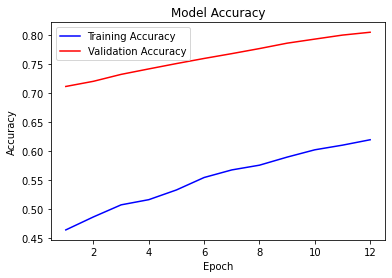

In [17]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=12, batch_size=128, validation_data=(x_test, y_test), verbose=1)
# Get the accuracy values from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(accuracy) + 1)

# Plot the accuracy over epochs
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

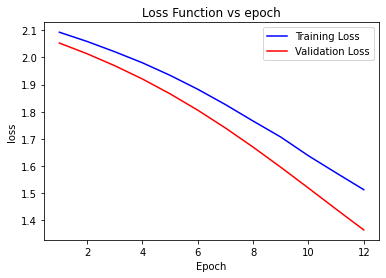

In [20]:
# Get the accuracy values from the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Function vs epoch')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

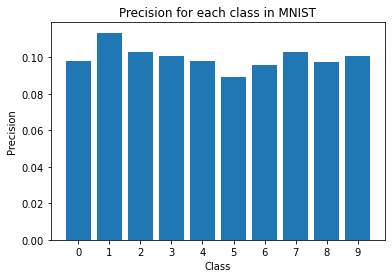

In [22]:
from sklearn.metrics import precision_score
predicted_labels = np.ones_like(y_test) * 7
precision_per_class = precision_score(y_test, predicted_labels, average=None)
class_labels = [str(i) for i in range(10)]
plt.bar(class_labels, precision_per_class)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class in MNIST')
plt.show()

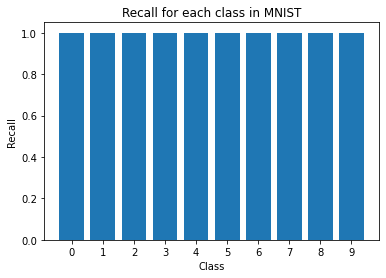

In [23]:
from sklearn.metrics import recall_score
predicted_labels = np.ones_like(y_test) * 7
recall_per_class = recall_score(y_test, predicted_labels, average=None)
class_labels = [str(i) for i in range(10)]
plt.bar(class_labels, recall_per_class)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for each class in MNIST')
plt.show()

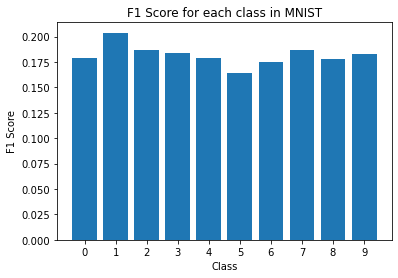

In [24]:
from sklearn.metrics import f1_score
predicted_labels = np.ones_like(y_test) * 7
f1_per_class = f1_score(y_test, predicted_labels, average=None)
class_labels = [str(i) for i in range(10)]
plt.bar(class_labels, f1_per_class)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for each class in MNIST')
plt.show()

### Model Interpretation:
- The train accuracy represents how well the model performs on the training data it was trained on. In this case, the value of 0.6194 indicates that the model correctly predicts the class of approximately 61.94% of the samples in the training dataset.The test accuracy represents how well the model generalizes to new, unseen data that it has not been exposed to during training. It is computed on a separate test dataset that the model has not seen during training. In this case, the value of 0.8044 (or 80.44%) indicates that the model correctly predicts the class of approximately 80.44% of the samples in the test dataset.The train accuracy is lower than the test accuracy, which suggests that the model is generalizing reasonably well to new data. This is a positive sign as it indicates that the model has learned to capture the underlying patterns in the data and can make accurate predictions on new samples.


- Training Loss:Training loss is a metric that represents how well the model is fitting the training data. During training, the model's parameters (weights and biases) are adjusted to minimize this loss. The training loss ideally should decrease as the model learns from the data and improves its ability to make accurate predictions on the training set. A decreasing training loss indicates that the model is learning from the data and making progress in minimizing prediction errors on the training set. Validation Loss: Validation loss is a metric that represents how well the model generalizes to new, unseen data.As training progresses, the training loss is continuing to decrease, but the validation loss starts to level off. This is because the model is becoming overly specialized to the training data (overfitting), and its ability to generalize to new data decreases.


- A precision score of 0.98 for digit 0 indicates that when the model predicts a sample as digit 0, it is correct approximately 98% of the time. A precision score of 0.18 for digit 1 suggests that the model has a relatively low accuracy in correctly predicting instances of digit 1. A precision score of 0.11 for digit 2 indicates that the model's accuracy in predicting instances of digit 2 is also low. It is correctly identifying digit 2 in only about 11% of the cases. A precision score of 0.99 for digit 3 suggests that the model is highly accurate in correctly predicting instances of digit 3.  precision score of 0.97 for digit 4 indicates that the model is accurate in correctly predicting instances of digit 4 in about 97% of the cases.  precision score of 0.97 for digit 4 indicates that the model is accurate in correctly predicting instances of digit 4 in about 97% of the cases. A precision score of 0.90 for digit 5 suggests that the model is quite accurate in identifying instances of digit 5. A precision score of 0.97 for digit 6 indicates that the model is accurate in correctly predicting instances of digit 6 in about 97% of the cases. A precision score of 0.10 for digit 7 suggests that the model's accuracy in correctly predicting instances of digit 7 is low. It means that the model is making many false positive predictions for digit 7.A precision score of 0.99 for digit 8 indicates that the model is highly accurate in correctly predicting instances of digit 8. It has a high true positive rate for digit 8 predictions.A precision score of 0.10 for digit 9 suggests that the model's accuracy in correctly predicting instances of digit 9 is low. It means that the model is making many false positive predictions for digit 9.


- If the recall score for all the digits is 1, it means that the model's performance is perfect in terms of correctly identifying all instances of each digit in a multi-class classification problem.


- A low F1 score of 0.176 for digit 0 indicates that the model's performance in correctly identifying instances of digit 0 is relatively poor. A low F1 score of 0.200 for digit 1 suggests that the model's performance in correctly identifying instances of digit 1 is also relatively poor. A low F1 score of 0.178 for digit 2 indicates that the model's performance in correctly identifying instances of digit 2 is relatively poor. A low F1 score of 0.177 for digit 3 suggests that the model's performance in correctly identifying instances of digit 3 is relatively poor. Same for remaining digits 4,5,6,7,8 and 9.